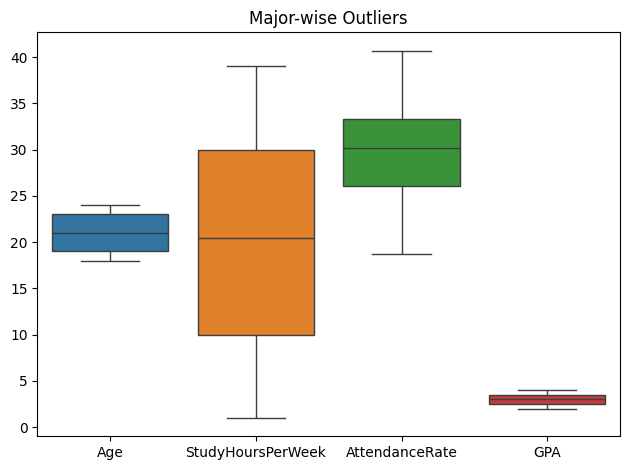

Top students with GPA above 3.0:
    StudentID  Total_GPA
0        149     162.81
1        360     162.18
2         31     159.97
3        405     157.82
4        311     157.74
5        132     157.49
6        330     157.35
7        283     157.31
8         21     155.81
9        224     155.32


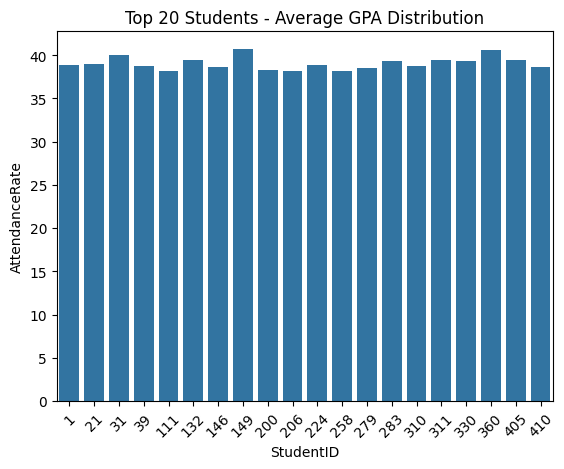

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# CSV লোড
df = pd.read_csv('student_performance_data.csv')


numeric_cols = [col for col in df.select_dtypes(include='number').columns if col != 'StudentID']


df.fillna(df[numeric_cols].mean(), inplace=True)

df['Total_GPA'] = df[numeric_cols].sum(axis=1)
df['AttendanceRate'] = df[numeric_cols].mean(axis=1)


conn = sqlite3.connect('student_performance.db')
df.to_sql('GPA', conn, if_exists='replace', index=False)


sns.boxplot(data=df[numeric_cols])
plt.title("Major-wise Outliers")
plt.tight_layout()
plt.show()

query = "SELECT StudentID, Total_GPA FROM GPA WHERE Total_GPA > 3.0 ORDER BY Total_GPA DESC LIMIT 10"
top_students = pd.read_sql_query(query, conn)
print('Top students with GPA above 3.0:\n', top_students)

# ✅ Bar Plot (Top 20 Students to avoid overlapping)
top_20 = df.nlargest(20, 'Total_GPA')
sns.barplot(data=top_20, x='StudentID', y='AttendanceRate')
plt.title('Top 20 Students - Average GPA Distribution')
plt.xticks(rotation=45)

plt.show()
